# **Amazon Sale Report Analysis**
Membuat sebuah analisis dari dataset yaitu 'Amazon Sale Report' yang didapat dari https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data untuk menambahkan insight mengenai:
1. Bagaimana tren penjualan produk berdasarkan kategori dari waktu ke waktu?
2. Produk dan Kategori mana yang paling laris berdasarkan jumlah dan total pendapatan?
3. Di negara bagian mana yang mengalami penjualan paling tinggi?
4. Bagaimana distribusi penjualan berdasarkan kota?
5. Berapa banyak pesanan yang dibatalkan atau dikirim tepat waktu dan bagaimana proporsinya terhadap total pesanan?

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Data**

In [2]:
# Membaca data CSV
file_path = 'Amazon Sale Report.csv'  # Ganti dengan path file CSV Anda
data = pd.read_csv(file_path)
data

<ipython-input-2-9e696d660c0b>:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


**Data Prepocessing**

In [3]:
# Menghapus spasi di nama kolom
data.columns = data.columns.str.strip()

# Menghapus Kolom yang tidak dibutuhkan
columns_to_drop = ['promotion-ids', 'fulfilled-by', 'Unnamed: 22', 'Courier Status']
data_cleaned = data.drop(columns=columns_to_drop)

# Mengubah kolom 'Date' menjadi format tanggal
data_cleaned['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y')

# Mengisi missing value pada beberapa kolom
data_cleaned['ship-city'].fillna('Unknown', inplace=True)
data_cleaned['ship-state'].fillna('Unknown', inplace=True)
data_cleaned['ship-postal-code'].fillna('Unknown', inplace=True)
data_cleaned['Amount'].fillna(0, inplace=True)
data_cleaned['currency'].fillna('Unknown', inplace=True)

# Menampilkan informasi data yang sudah dibersihkan
data_cleaned.info()
data_cleaned.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Qty                 128975 non-null  int64         
 13  currency            128975 no

<ipython-input-3-96a9dc3d823b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['ship-city'].fillna('Unknown', inplace=True)
<ipython-input-3-96a9dc3d823b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,1,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,1,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,0,Unknown,0.00,HYDERABAD,TELANGANA,500008.0,IN,False
9,9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,1,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False


**Trend Analysis**

<Figure size 1200x600 with 0 Axes>

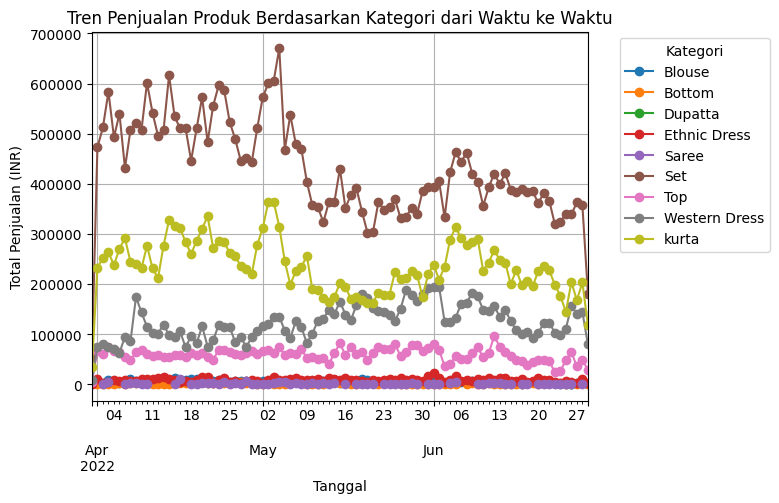

In [4]:
# Analisis tren penjualan berdasarkan kategori dari waktu ke waktu
sales_trend = data_cleaned.groupby(['Date', 'Category'])['Amount'].sum().unstack()
plt.figure(figsize=(12, 6))
sales_trend.plot(marker='o')
plt.title('Tren Penjualan Produk Berdasarkan Kategori dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (INR)')
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

**Best-Selling Products**

In [5]:
# Produk dan kategori paling laris berdasarkan jumlah pesanan dan total pendapatan
top_products = data_cleaned.groupby(['SKU', 'Category']).agg({'Order ID': 'count', 'Amount': 'sum'}).reset_index()
top_products.columns = ['SKU', 'Category', 'Total Orders', 'Total Revenue']
top_products = top_products.sort_values(by='Total Revenue', ascending=False)

print("Produk dan Kategori Paling Laris:")
print(top_products.head(10))  # Menampilkan 10 produk teratas

Produk dan Kategori Paling Laris:
                  SKU       Category  Total Orders  Total Revenue
1346      J0230-SKD-M            Set           507      527699.20
4548     JNE3797-KR-L  Western Dress           773      524581.77
1347      J0230-SKD-S            Set           452      479937.14
4549     JNE3797-KR-M  Western Dress           657      454290.16
4550     JNE3797-KR-S  Western Dress           587      407302.57
4551    JNE3797-KR-XL  Western Dress           474      332155.24
1345      J0230-SKD-L            Set           297      305616.95
4552    JNE3797-KR-XS  Western Dress           431      303616.70
6305  SET268-KR-NP-XL            Set           386      284058.96
4554  JNE3797-KR-XXXL  Western Dress           386      276375.80


**Sales By States**

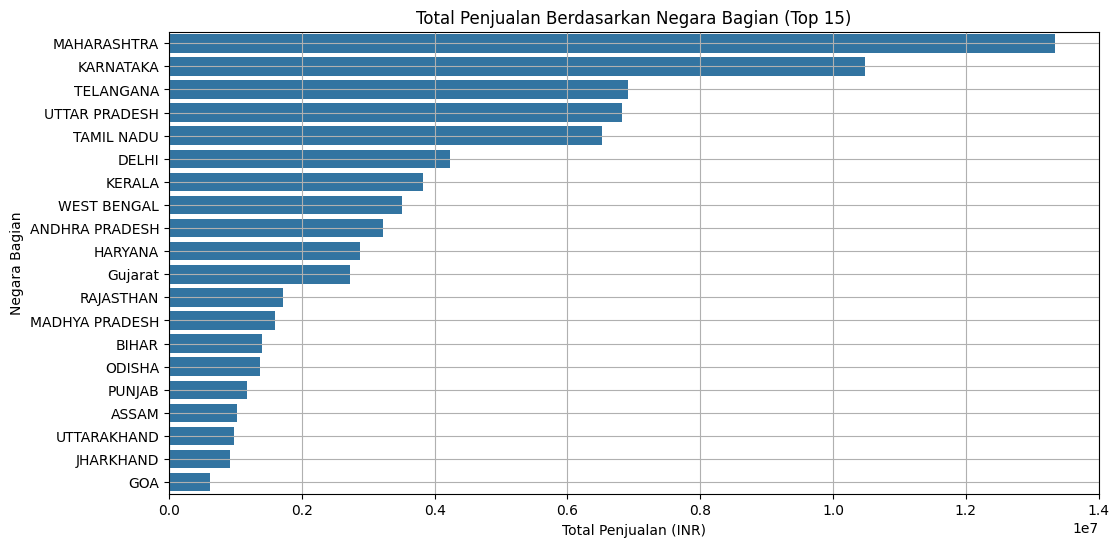

In [12]:
# Menampilkan hanya 20 negara bagian dengan penjualan tertinggi
top_15_states = sales_by_state.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='ship-state', data=top_15_states)
plt.title('Total Penjualan Berdasarkan Negara Bagian (Top 15)')
plt.xlabel('Total Penjualan (INR)')
plt.ylabel('Negara Bagian')
plt.grid()
plt.show()


**Sales Distribution by City**

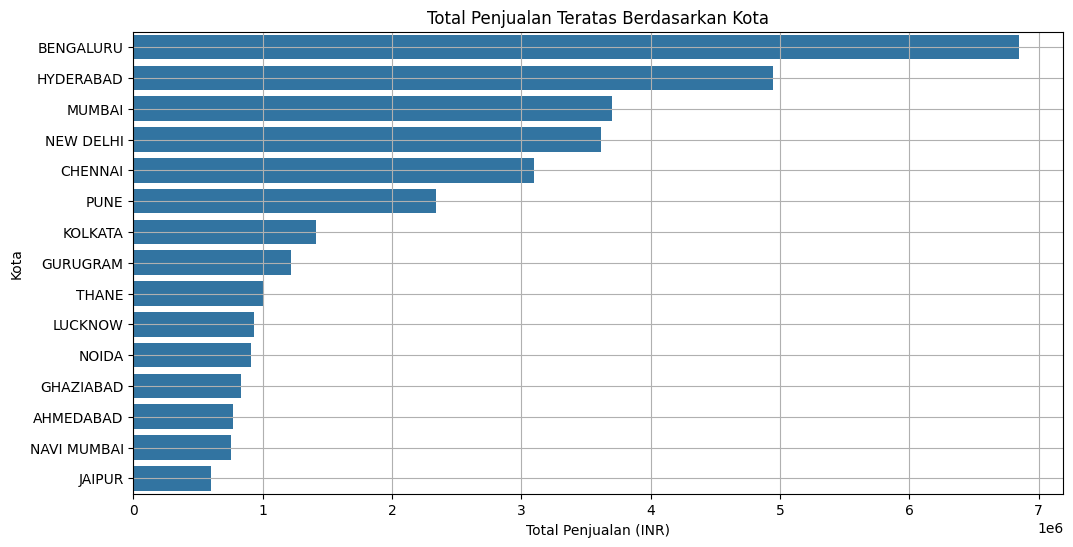

In [9]:
# Distribusi penjualan berdasarkan kota
sales_by_city = data_cleaned.groupby('ship-city')['Amount'].sum().reset_index()
sales_by_city = sales_by_city.sort_values(by='Amount', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='ship-city', data=sales_by_city)
plt.title('Total Penjualan Teratas Berdasarkan Kota')
plt.xlabel('Total Penjualan (INR)')
plt.ylabel('Kota')
plt.grid()
plt.show()

**Order Cancellation Analysis**
Menghitung dan memunculkan jumlah dan proporsi dari "Canceled Orders vs Fulfilled Orders"

In [10]:
# Menghitung pesanan yang dibatalkan dan dikirimkan tepat waktu
total_orders = len(data_cleaned)
cancelled_orders = data_cleaned[data_cleaned['Status'] == 'Cancelled'].shape[0]
fulfilled_orders = total_orders - cancelled_orders

# Menghitung proporsi
proportion_cancelled = (cancelled_orders / total_orders) * 100
proportion_fulfilled = (fulfilled_orders / total_orders) * 100

print(f"Total Pesanan: {total_orders}")
print(f"Pesanan Dibatalkan: {cancelled_orders} ({proportion_cancelled:.2f}%)")
print(f"Pesanan Terpenuhi: {fulfilled_orders} ({proportion_fulfilled:.2f}%)")


Total Pesanan: 128975
Pesanan Dibatalkan: 18332 (14.21%)
Pesanan Terpenuhi: 110643 (85.79%)


**Conclusion**

Berdasarkan analisis menyeluruh terhadap data penjualan, kami dapat menarik beberapa kesimpulan yang signifikan mengenai dinamika pasar dan perilaku konsumen.

Pertama, tren penjualan berdasarkan kategori produk menunjukkan adanya fluktuasi permintaan yang bervariasi sepanjang waktu, di mana kategori tertentu menunjukkan pertumbuhan yang konsisten. Hal ini mengindikasikan bahwa perusahaan perlu memprioritaskan strategi pengadaan dan pemasaran untuk kategori-kategori tersebut guna memaksimalkan potensi pendapatan. Selain itu, identifikasi produk dan kategori terlaris melalui analisis jumlah pesanan dan total pendapatan memberikan wawasan penting tentang kontribusi masing-masing produk terhadap kinerja keseluruhan, serta potensi produk yang mungkin perlu ditingkatkan dalam hal visibilitas dan penawaran.

Analisis distribusi penjualan berdasarkan lokasi geografi juga memperlihatkan pola yang menarik, di mana beberapa negara bagian menunjukkan performa penjualan yang signifikan, sementara yang lain menunjukkan potensi yang belum tergarap. Temuan ini memberikan kesempatan bagi perusahaan untuk fokus dalam meningkatkan penetrasi pasar di area dengan penjualan rendah, melalui pendekatan pemasaran yang lebih agresif dan penawaran produk yang disesuaikan dengan preferensi lokal.

Terakhir, evaluasi status pemesanan mengungkapkan proporsi pesanan yang dibatalkan yang tinggi, yang menunjukkan adanya tantangan dalam proses pemenuhan dan mungkin berdampak negatif pada kepuasan pelanggan. Untuk itu, perlu dilakukan perbaikan dalam proses operasional dan manajemen layanan pelanggan agar dapat mengurangi tingkat pembatalan dan meningkatkan pengalaman pelanggan secara keseluruhan. Dengan memanfaatkan temuan dari analisis ini, perusahaan dapat merumuskan strategi yang lebih terarah dan berbasis data, yang tidak hanya meningkatkan penjualan dan efisiensi operasional tetapi juga membangun loyalitas pelanggan dan keunggulan kompetitif di pasar yang semakin kompetitif.